In [11]:
from gluonts.dataset.repository import get_dataset

import numpy as np
import matplotlib.pyplot as plt

import os
import pickle

# Preparation

Load the results

In [12]:
dataset_name = 'nn5_weekly'
normalizer_name = 'gas_t_student'

strenghts = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.49, 0.499, 0.5]

means = []
for strength in strenghts:

    folder = f'../T_STUD_CHANGING_STRENGTH_MULTIVARIATE/RESULTS_{strength}'
    if not os.path.exists(folder):
        os.makedirs(folder)
    dataset_folder = os.path.join(folder, dataset_name)


    normalizer_folder = os.path.join(dataset_folder, normalizer_name)
    init_params_norm_filename = os.path.join(normalizer_folder, 'init_params.json')
    ###
    means_folder = os.path.join(normalizer_folder, 'means')
    test_means_folder = os.path.join(means_folder, 'test')
    vars_folder = os.path.join(normalizer_folder, 'vars')
    test_vars_folder = os.path.join(vars_folder, 'test')
    norm_ts_folder = os.path.join(normalizer_folder, 'normalized_ts')
    test_norm_ts_folder = os.path.join(norm_ts_folder, 'test')

    test_means = []
    for i in range(len(os.listdir(test_means_folder))):
        with open(os.path.join(test_means_folder, f'ts_{i}.pkl'), 'rb') as f:
            test_means.append(pickle.load(f))
    
    means.append(test_means)

len(means), len(means[0]), means[0][0].shape

(9, 1, (113, 111))

Get the dataset

In [13]:
dataset = get_dataset(dataset_name)
test_dataset = [el["target"] for el in dataset.test]

len(test_dataset), type(test_dataset[0]), test_dataset[0].shape

(111, numpy.ndarray, (113,))

# Plot ts with different values computed by the GAS normalizer

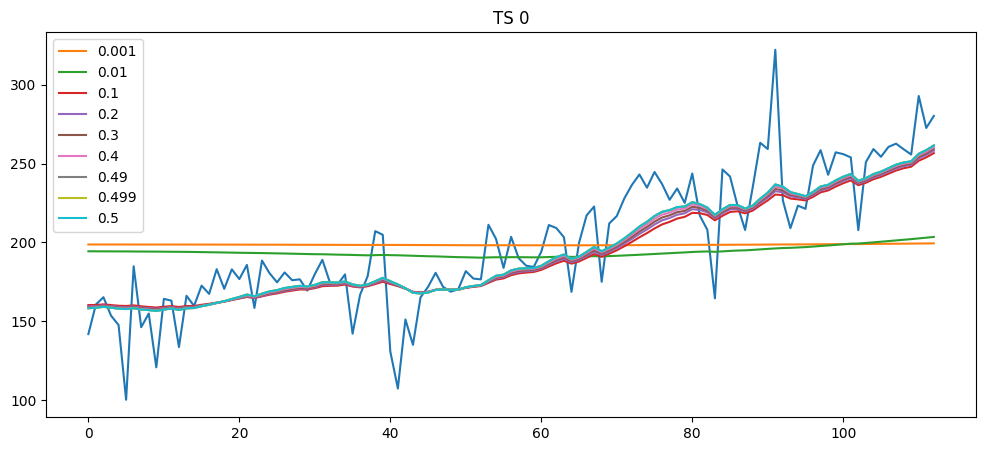

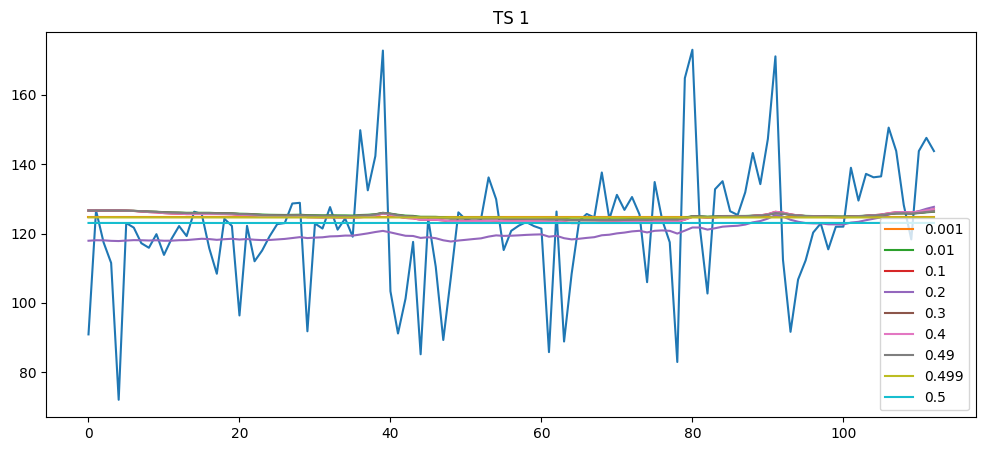

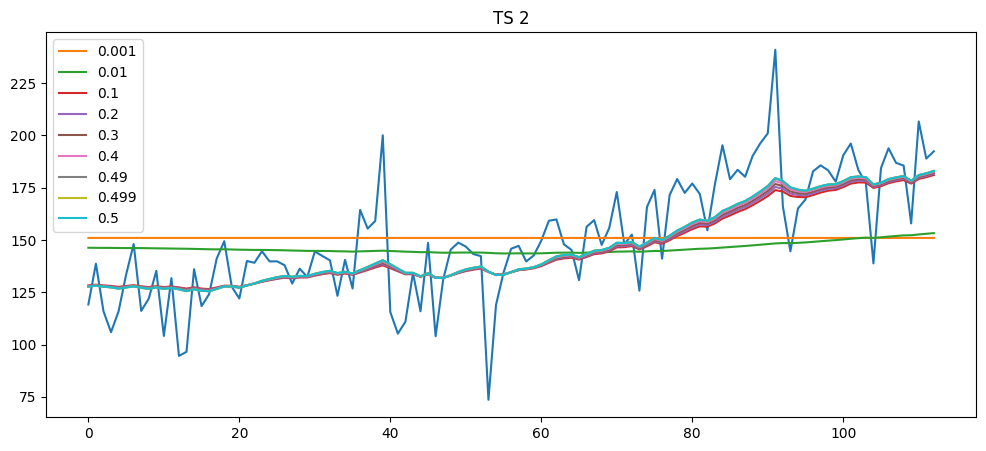

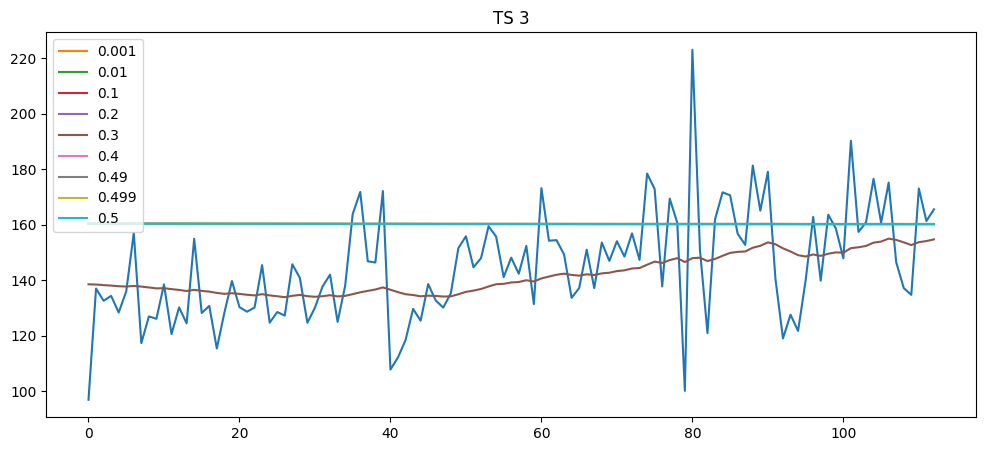

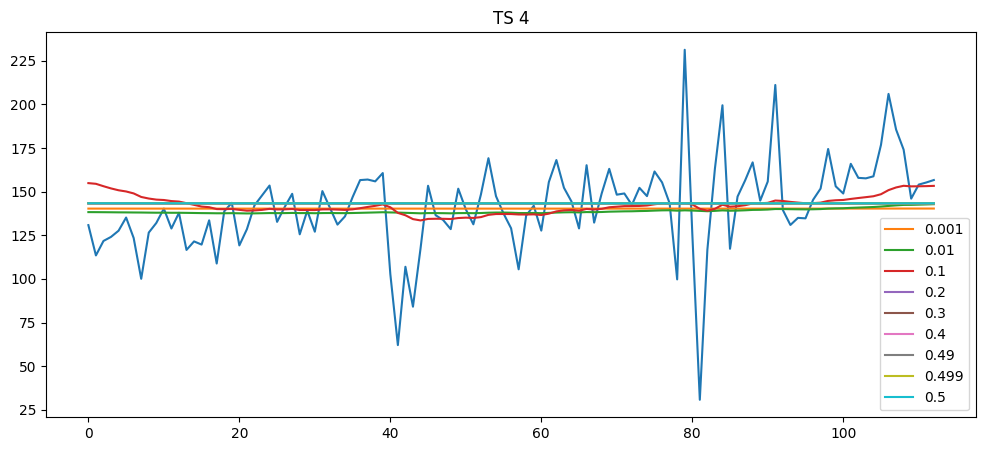

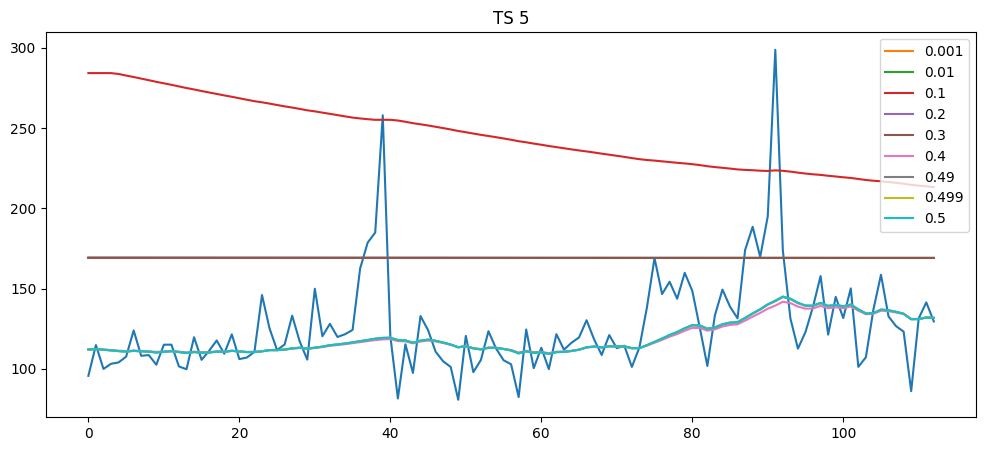

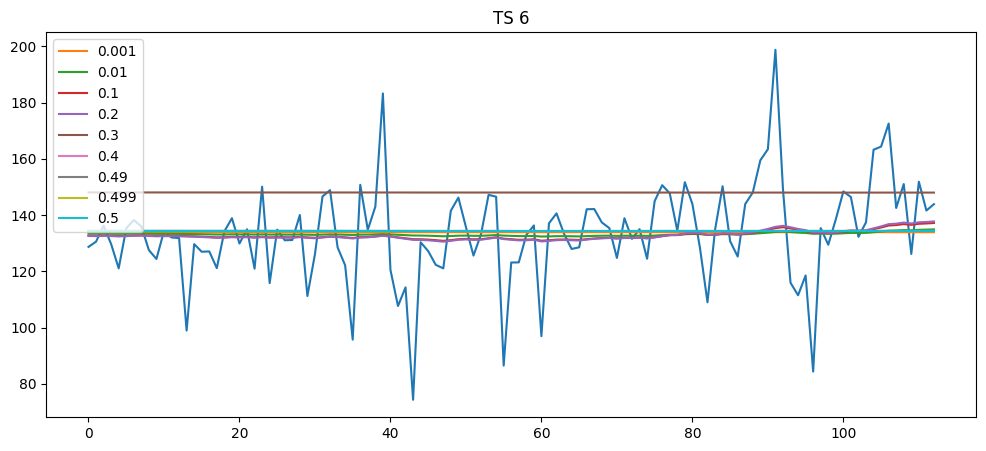

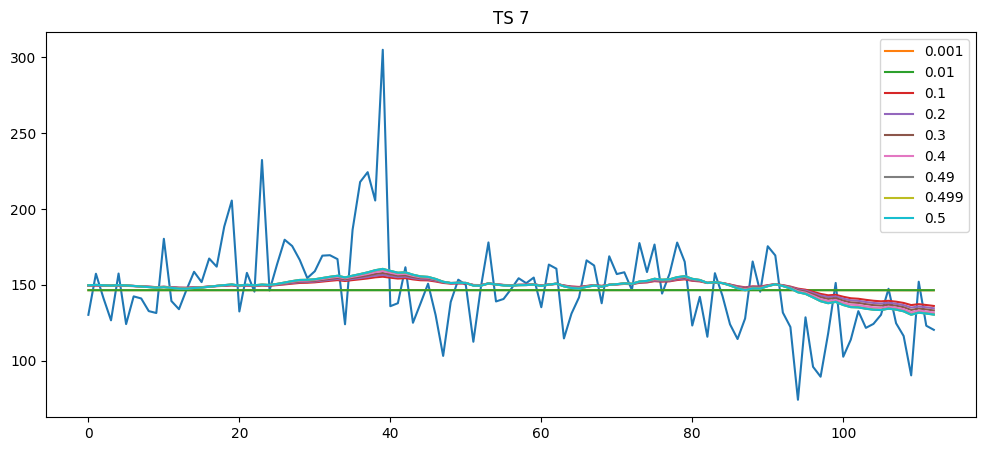

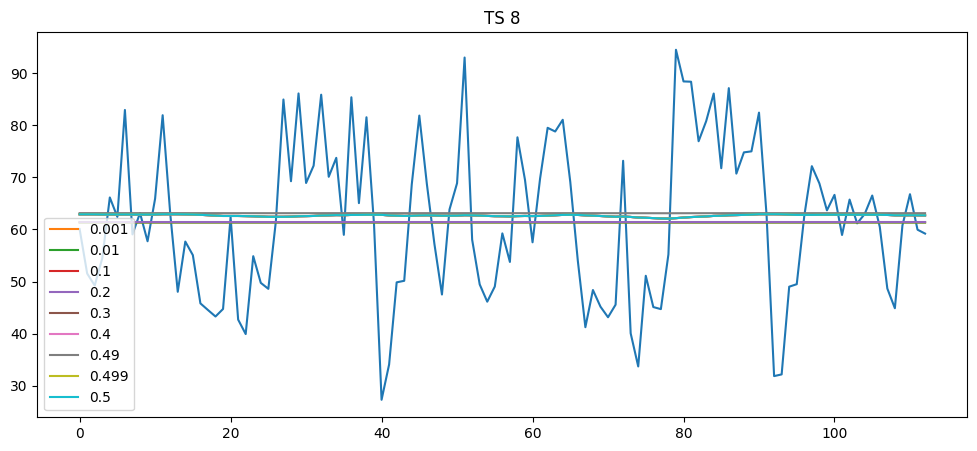

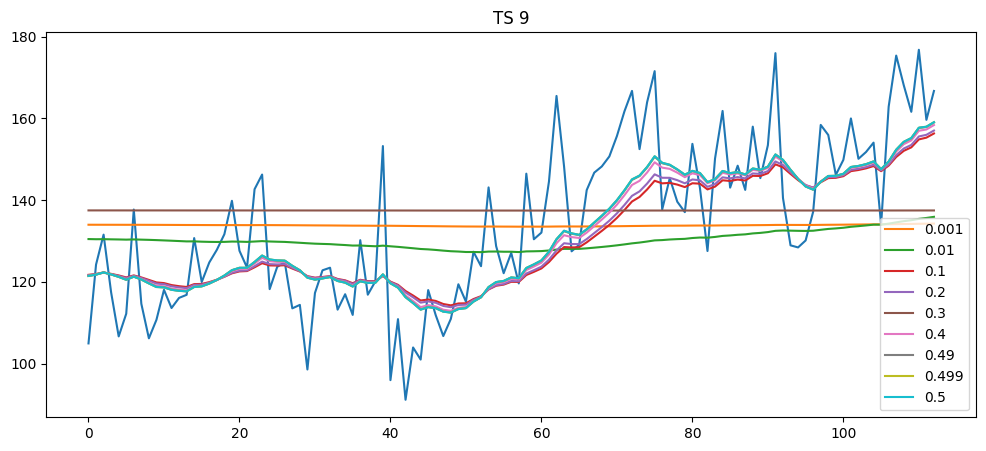

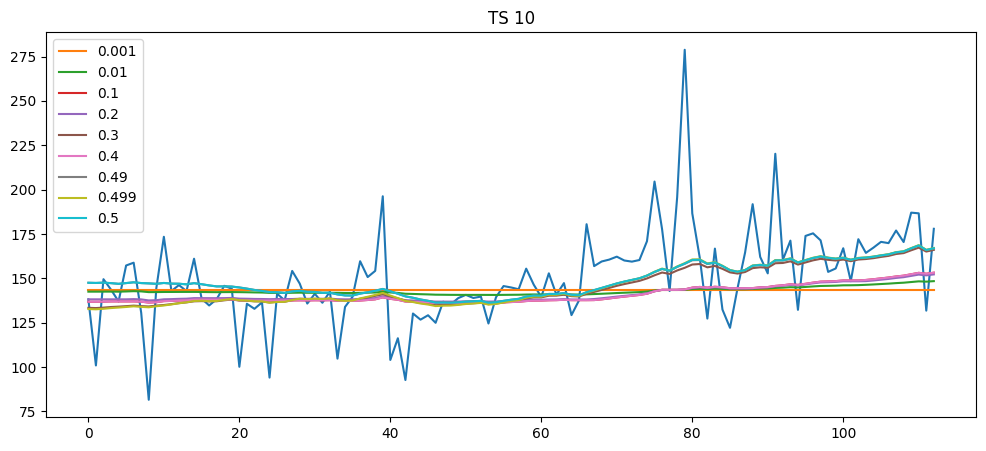

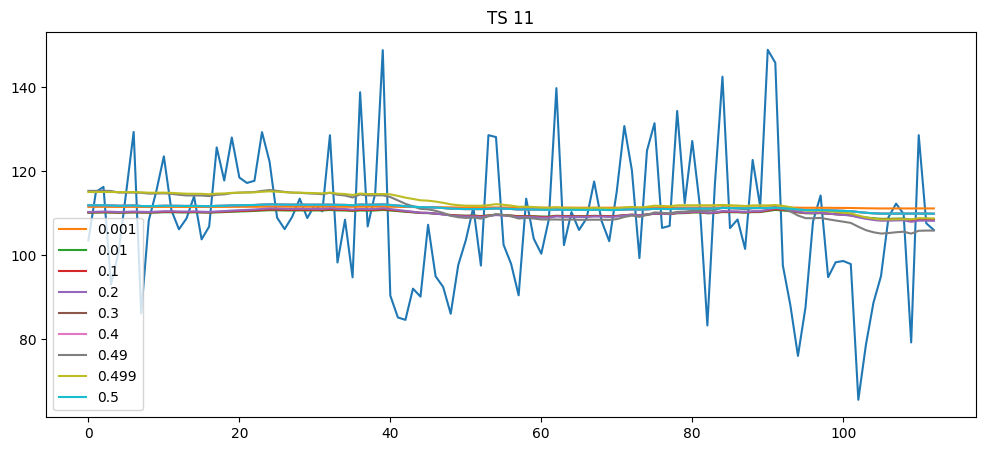

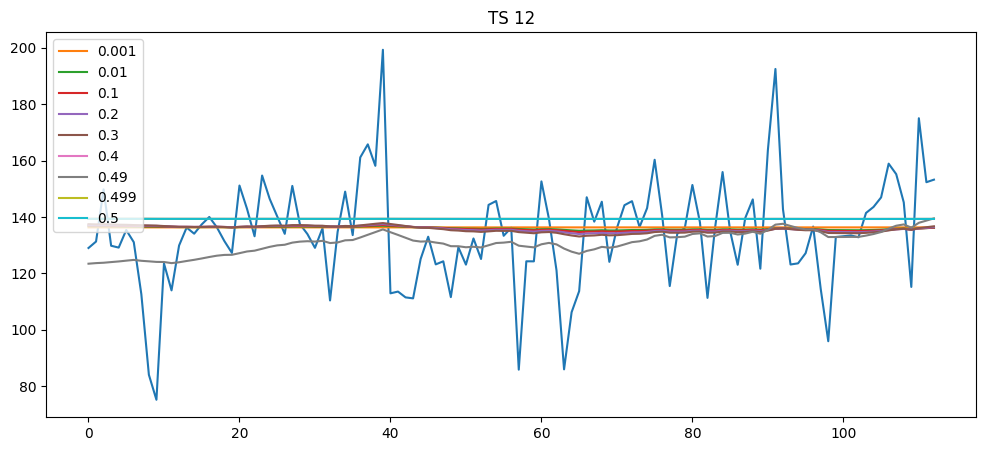

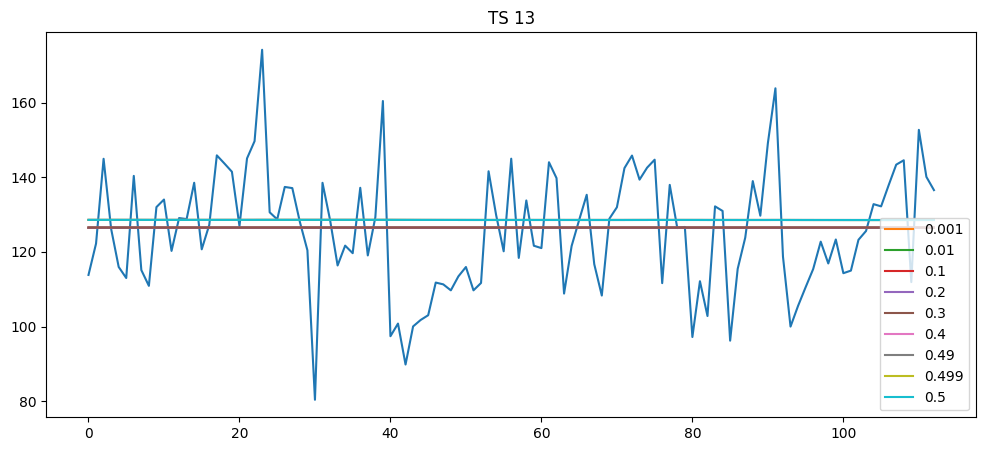

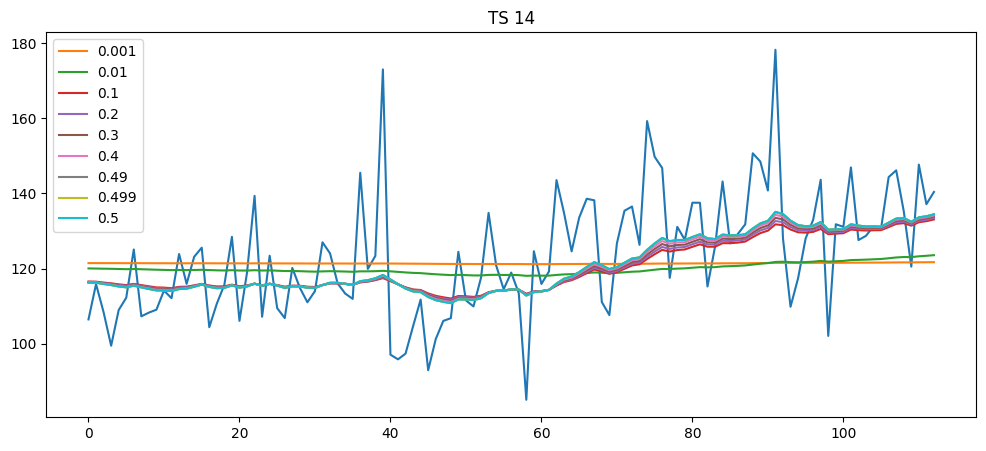

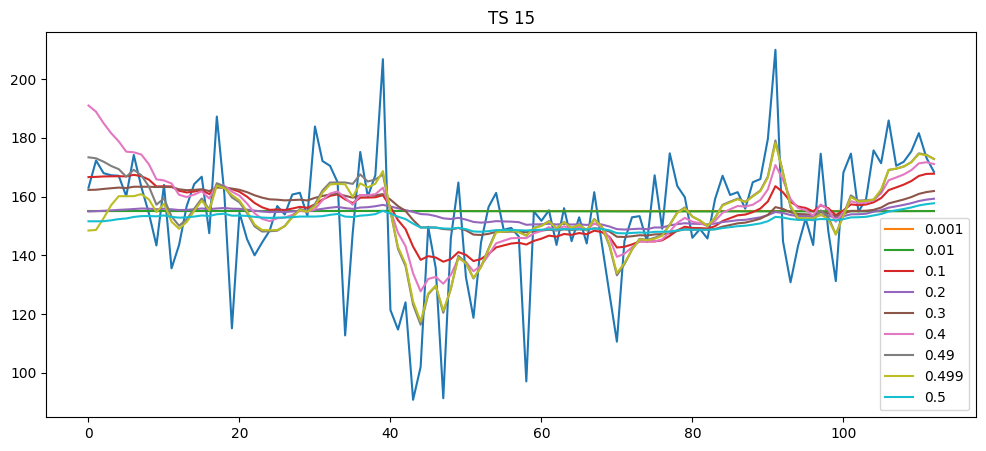

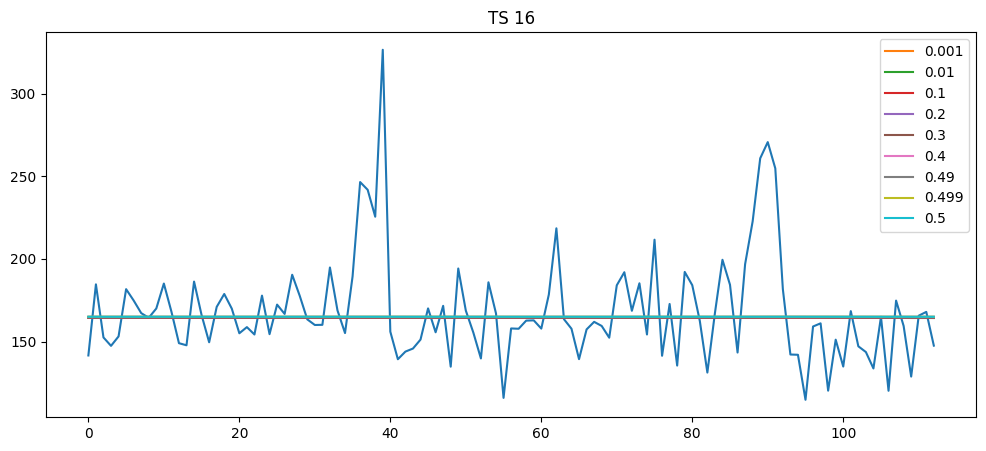

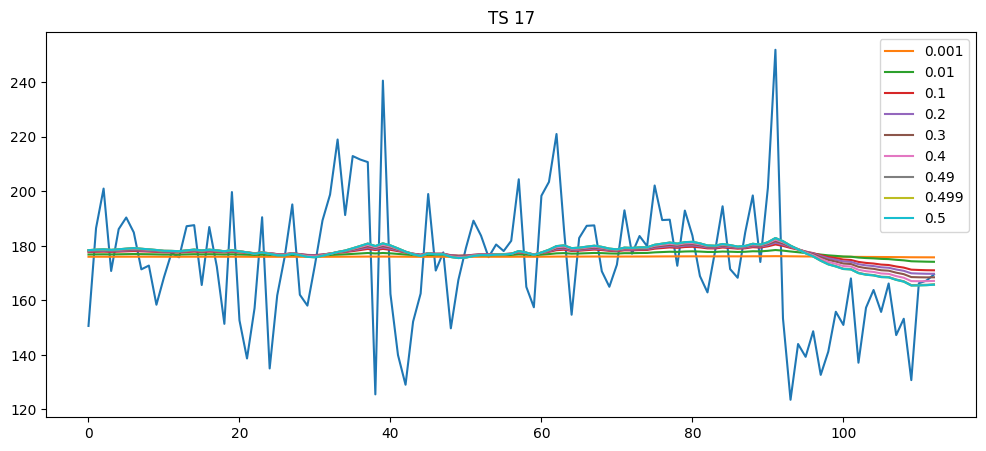

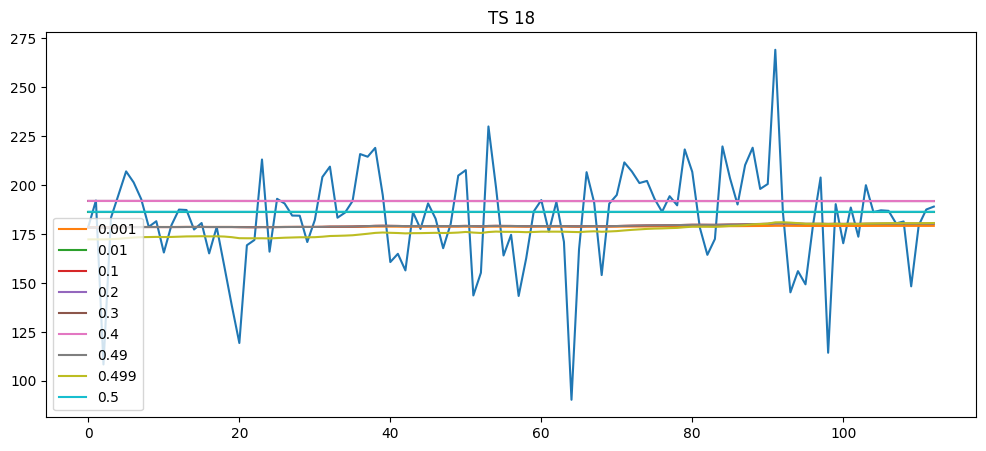

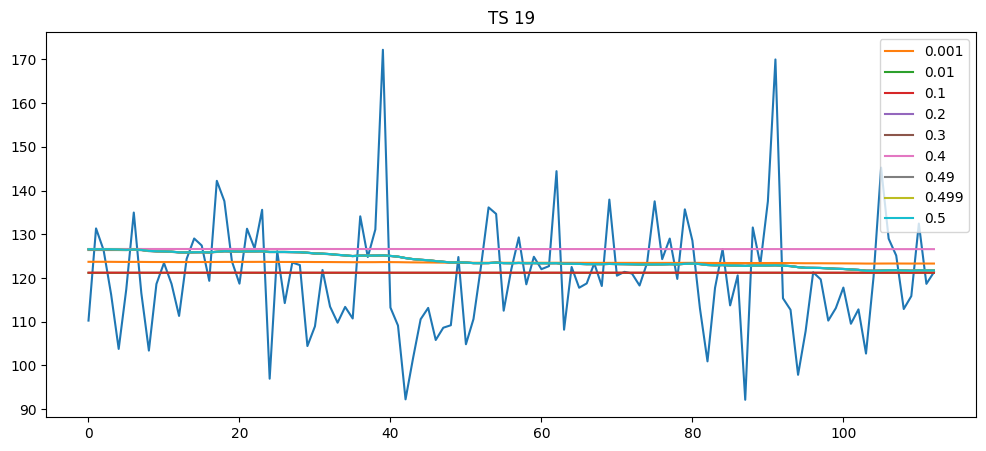

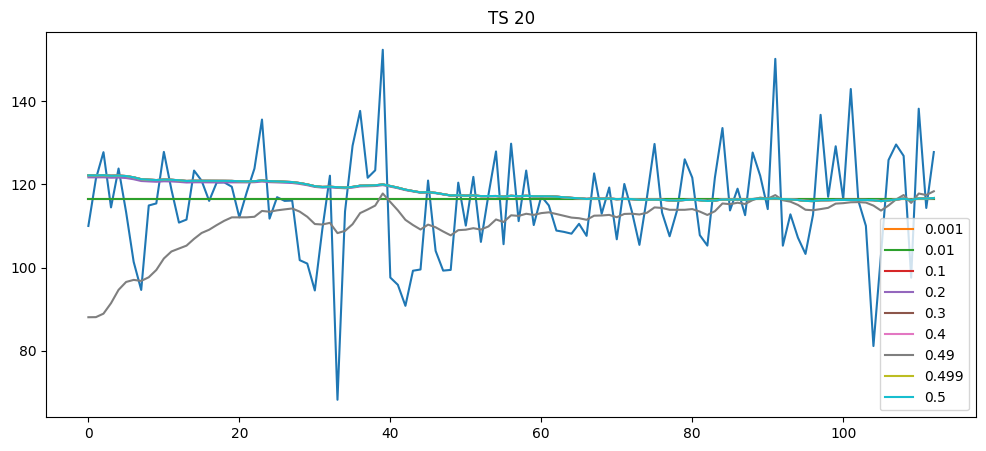

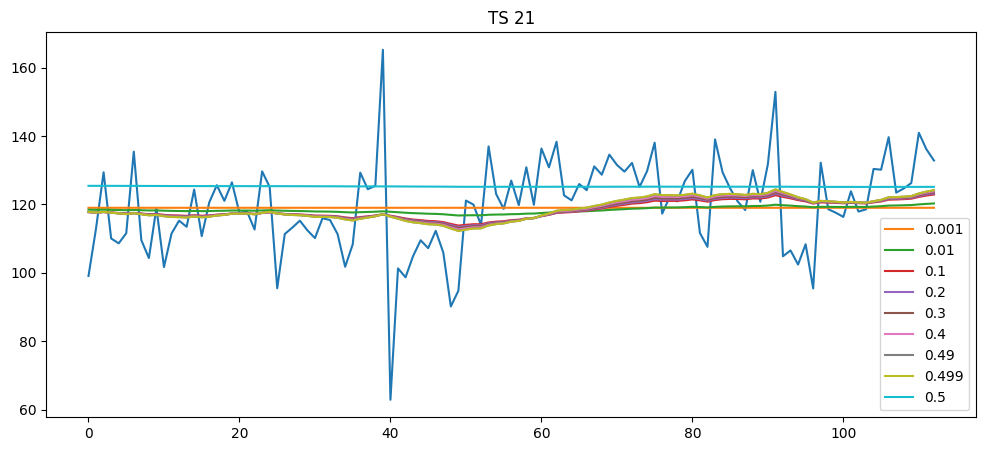

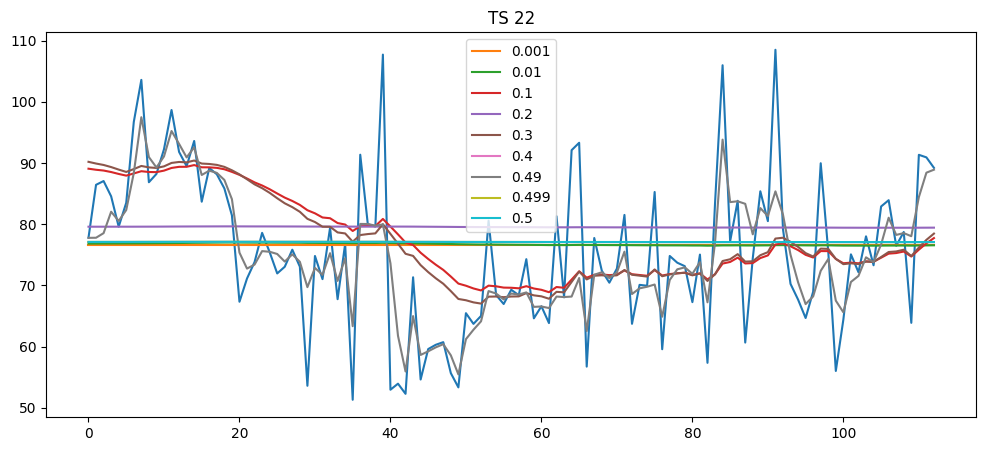

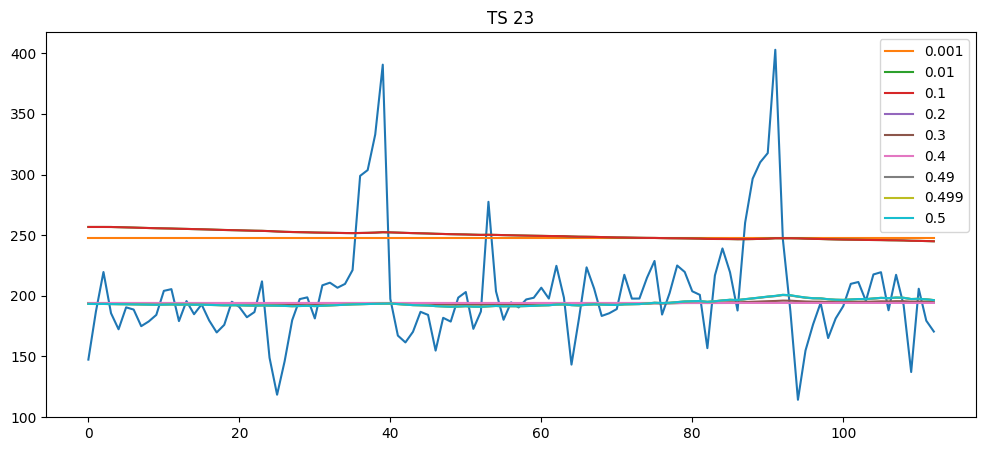

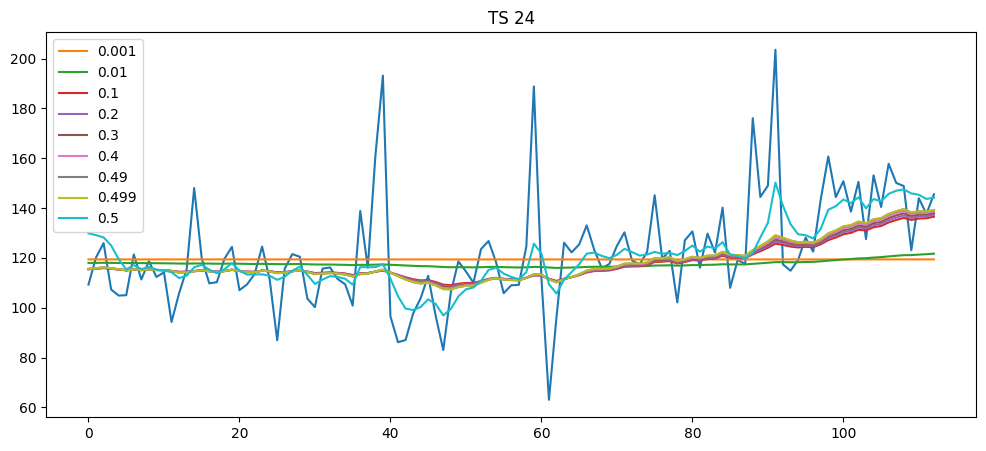

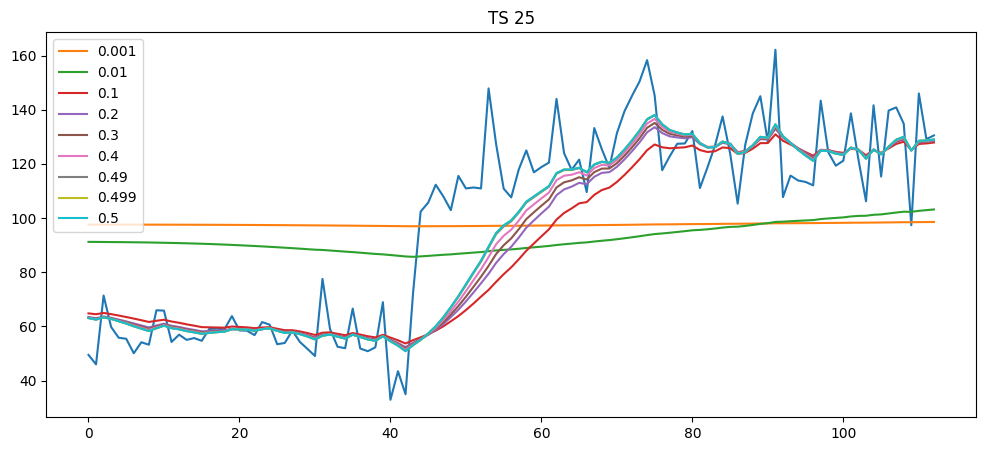

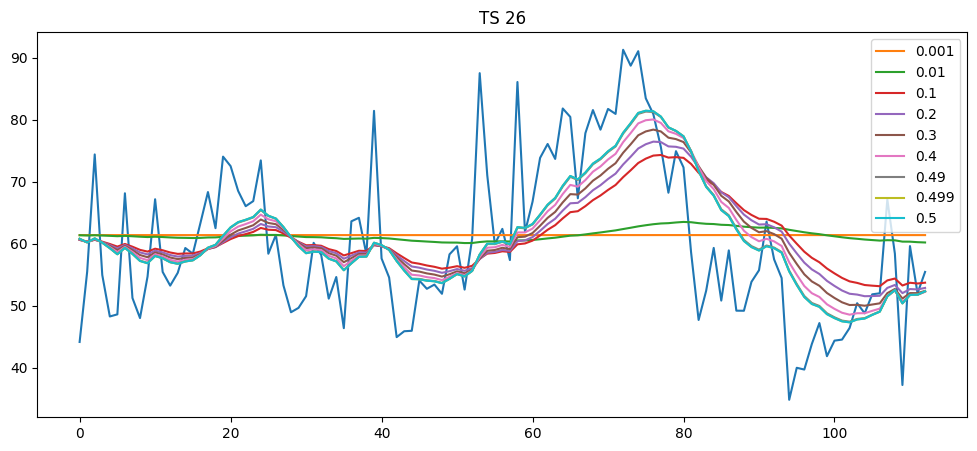

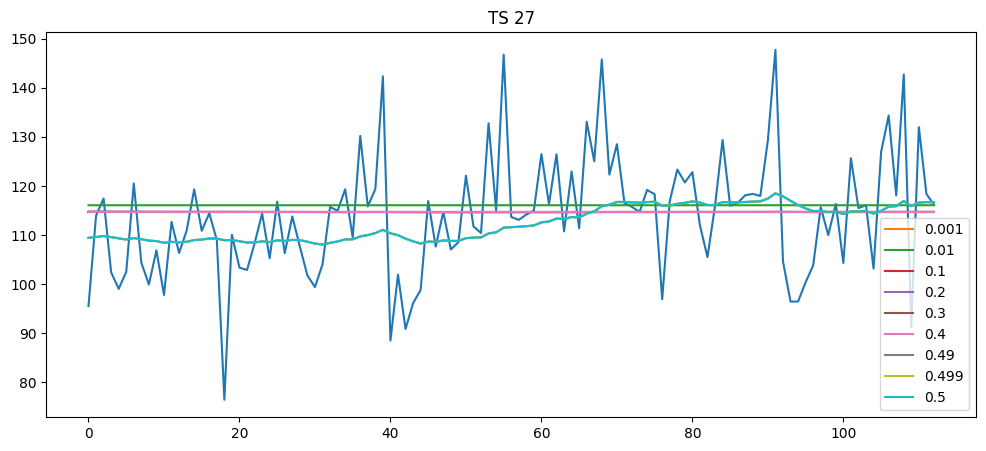

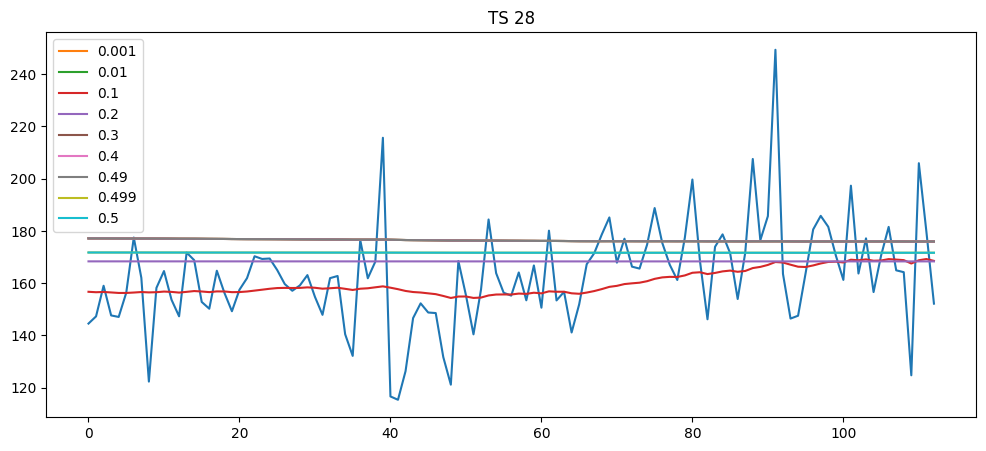

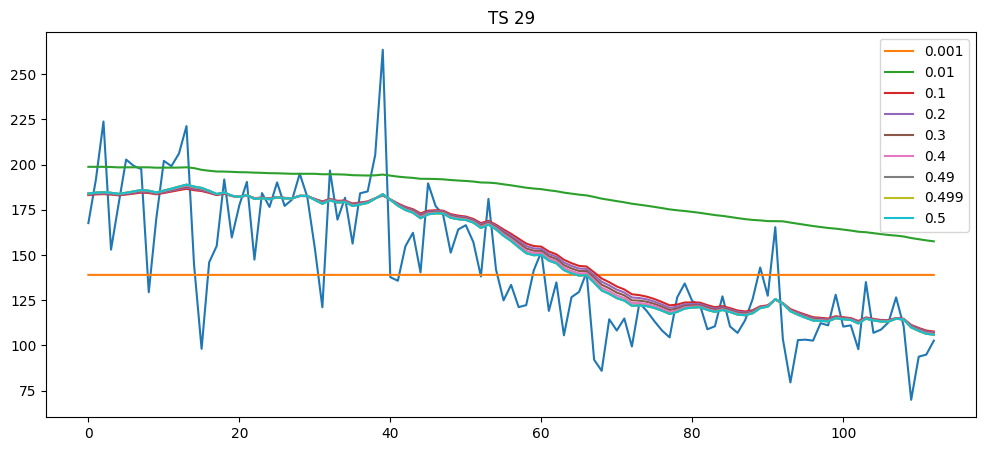

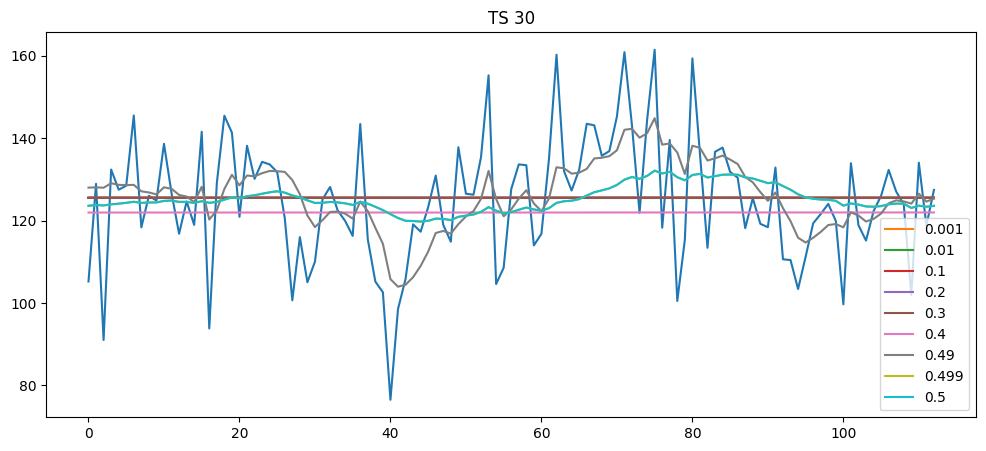

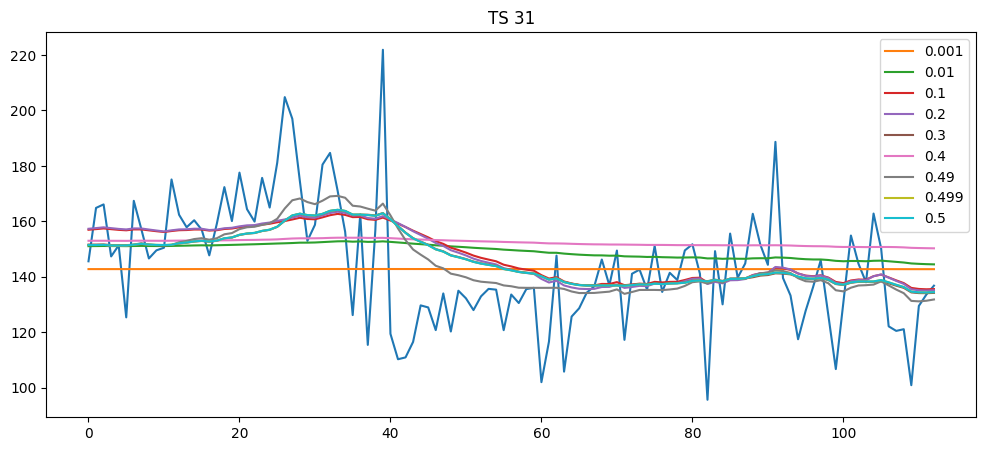

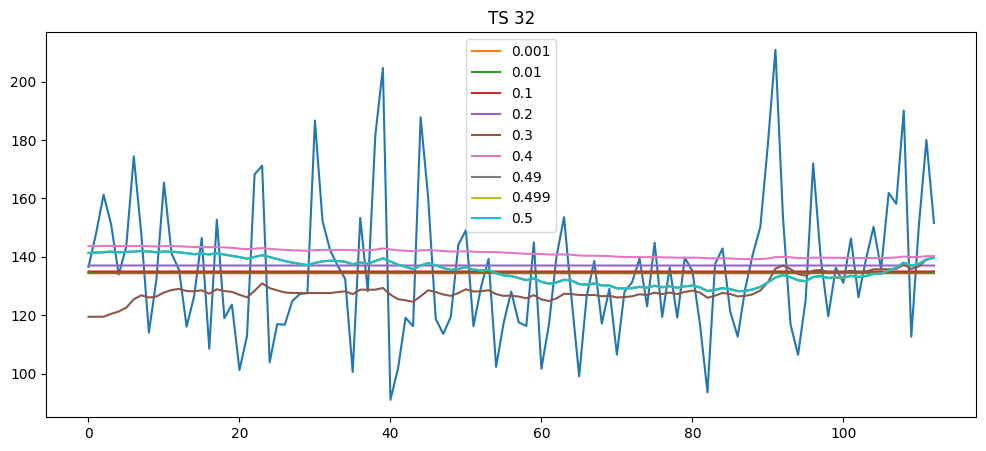

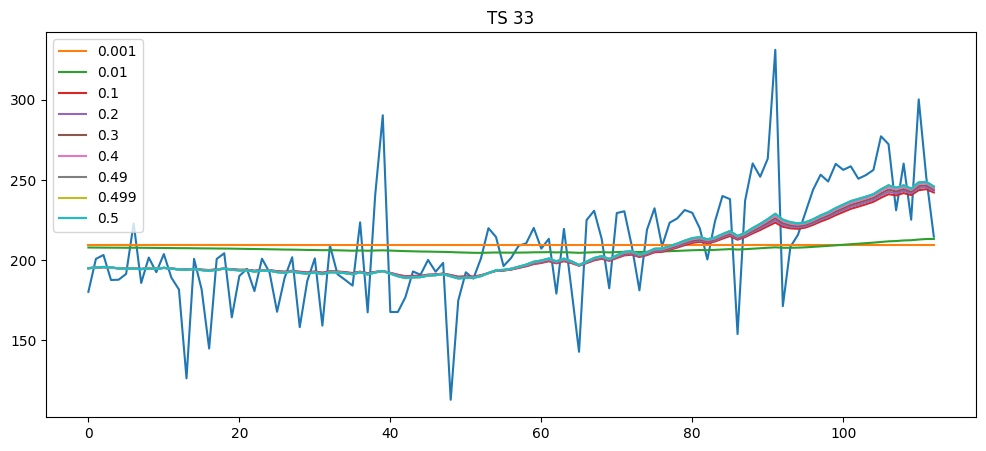

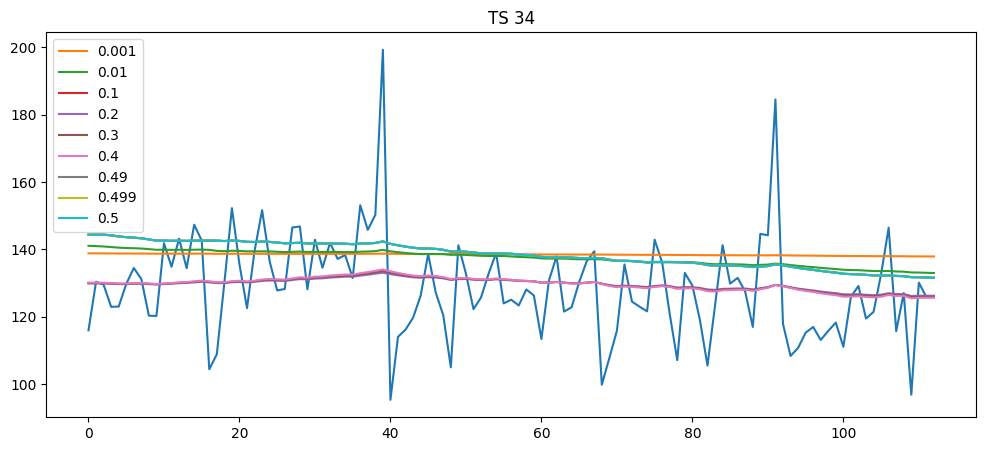

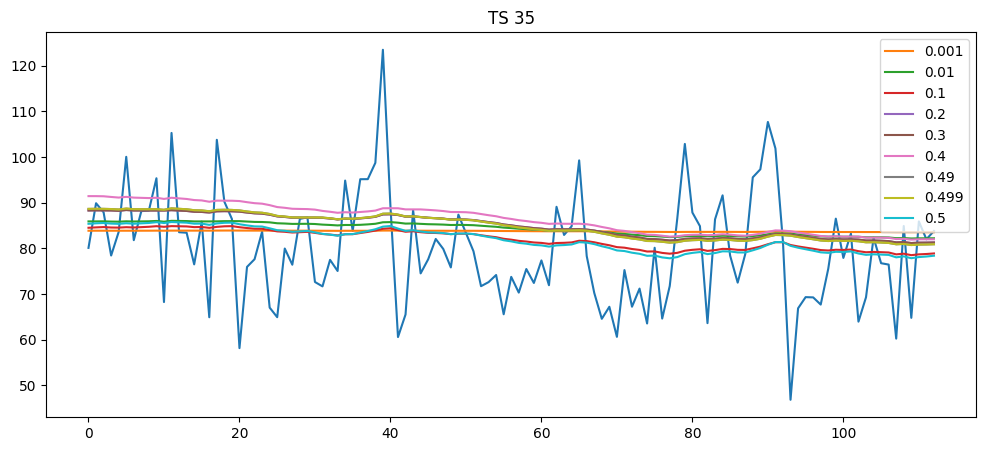

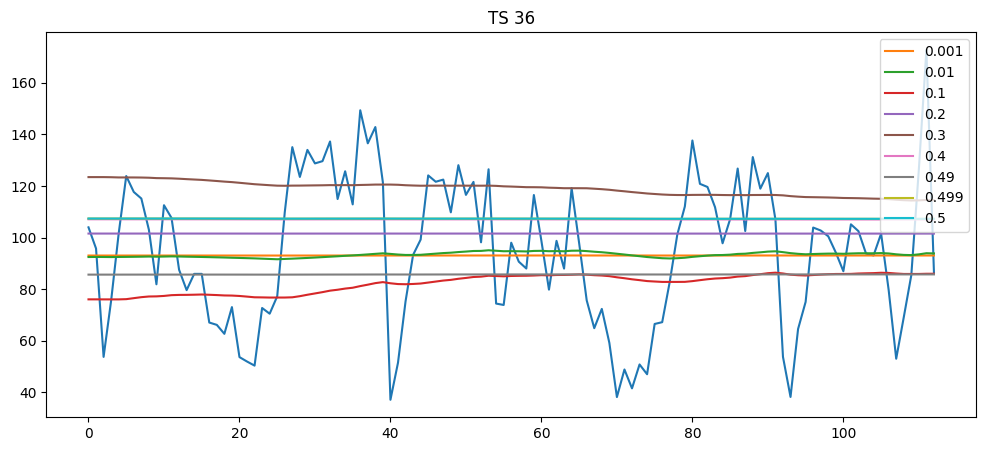

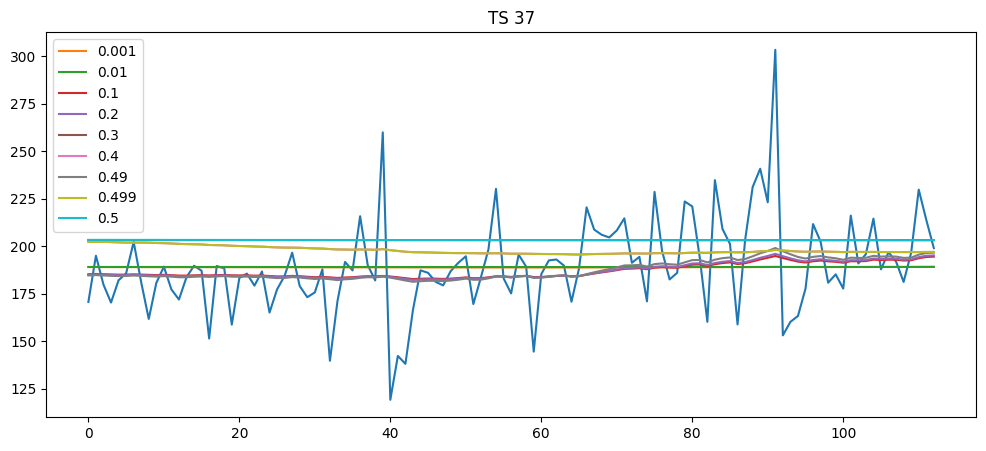

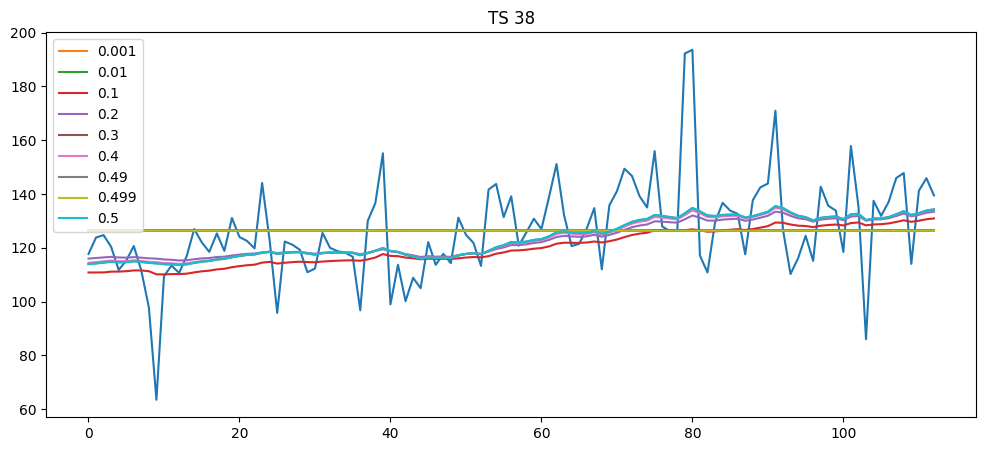

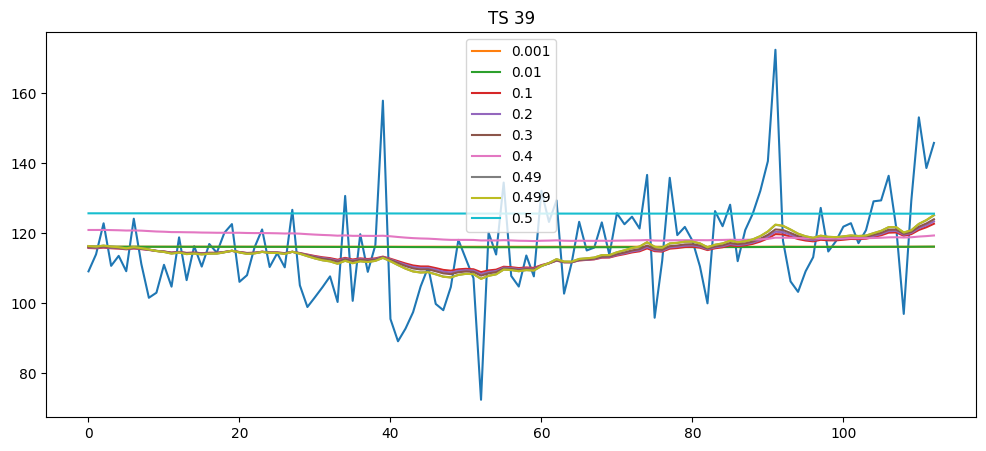

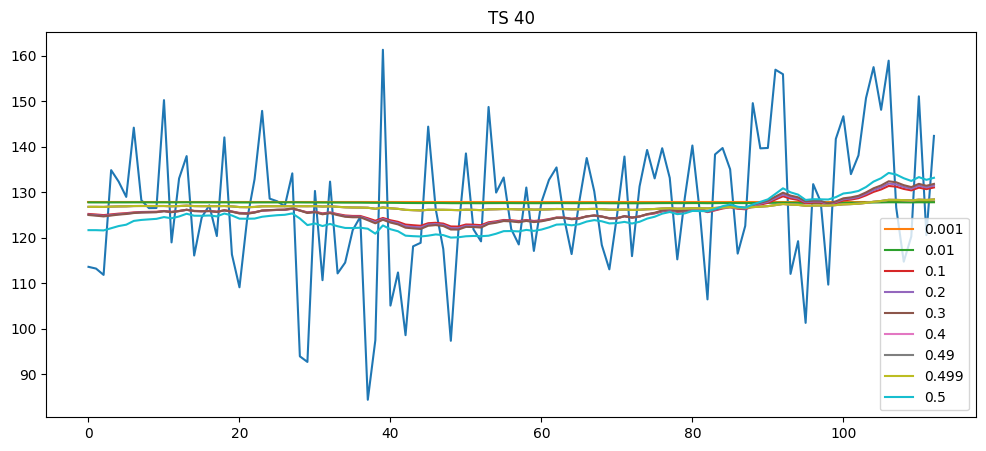

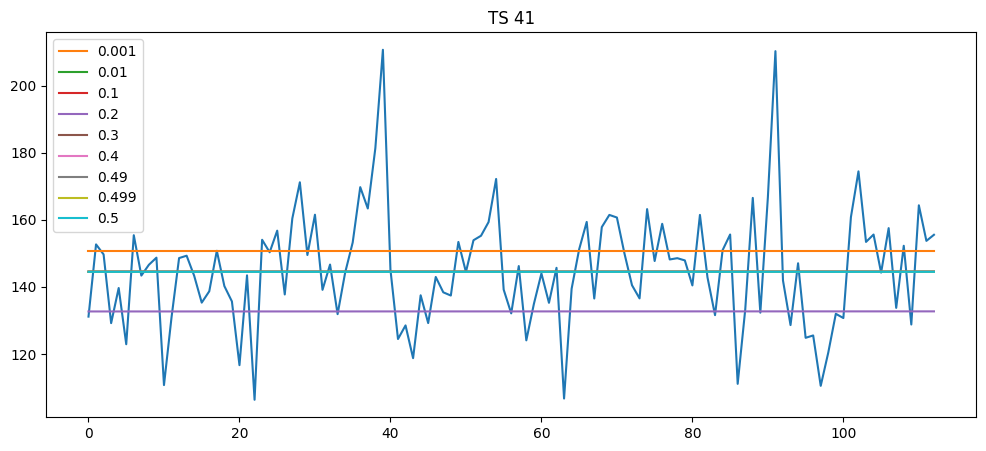

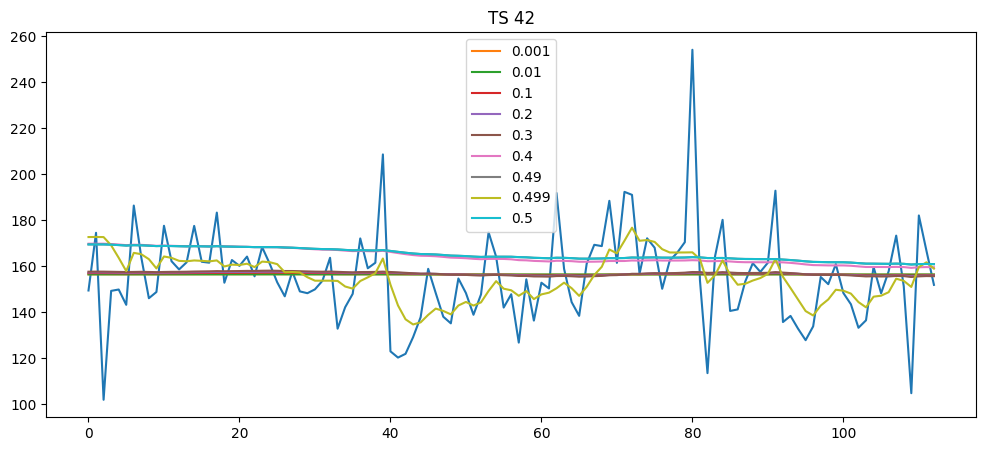

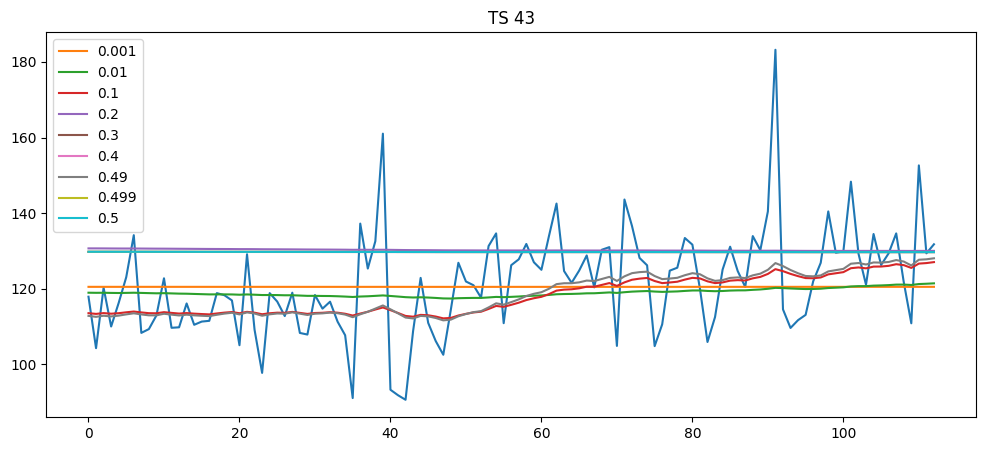

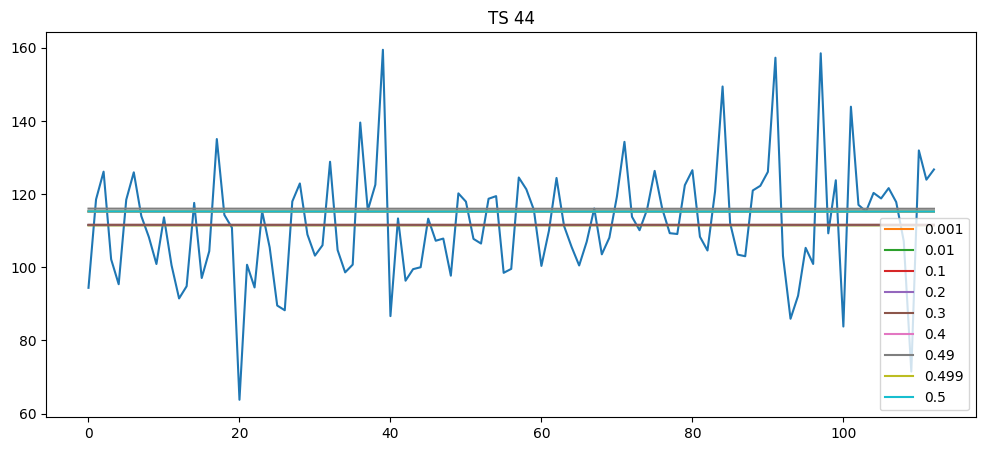

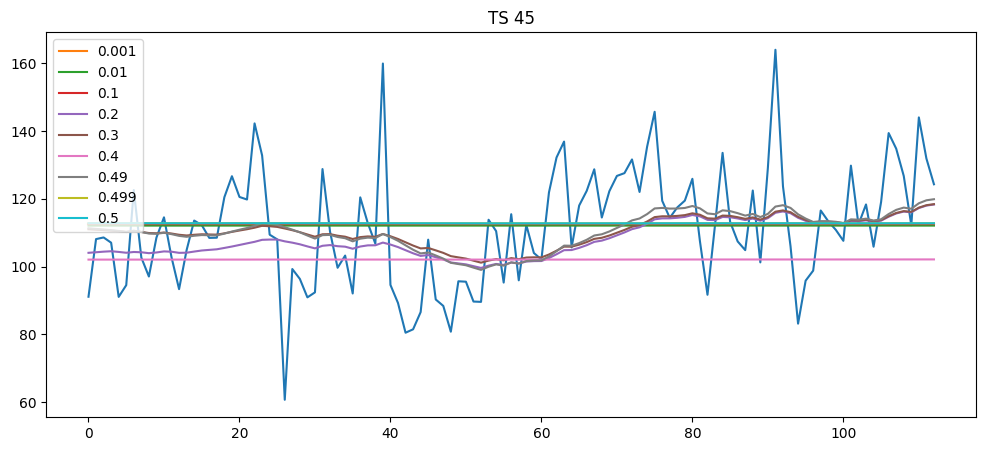

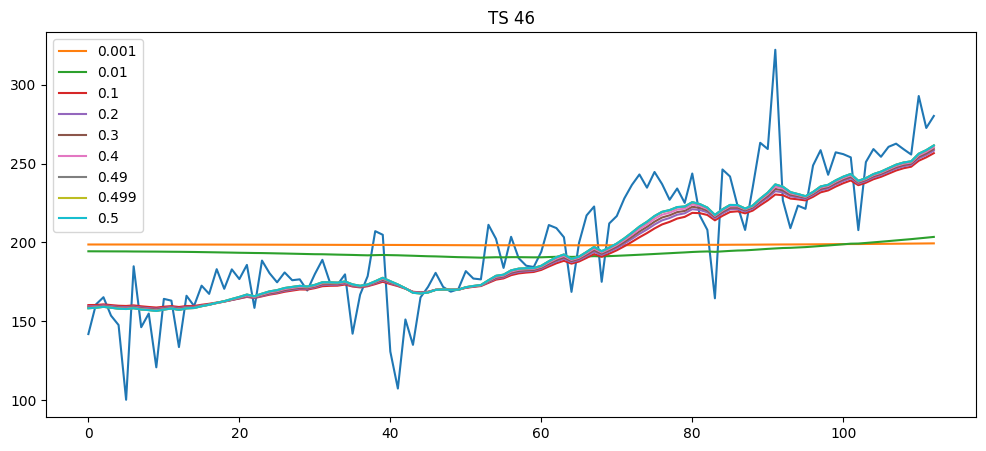

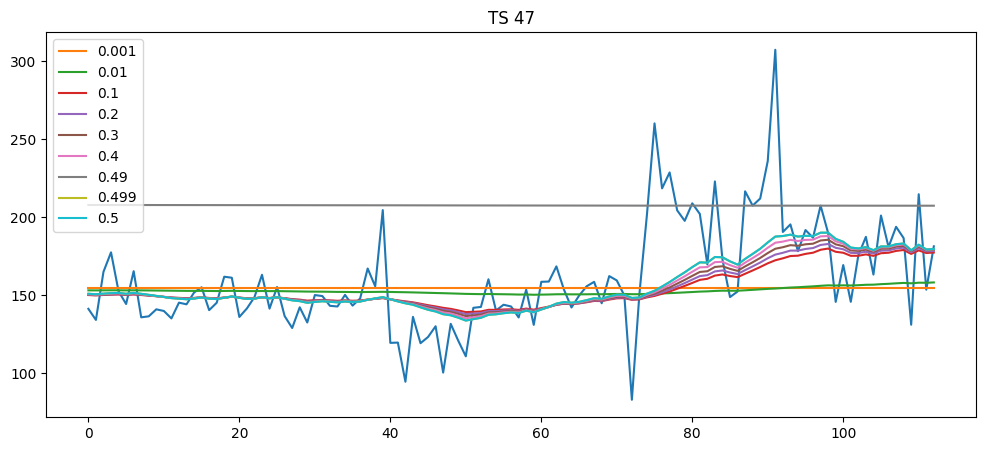

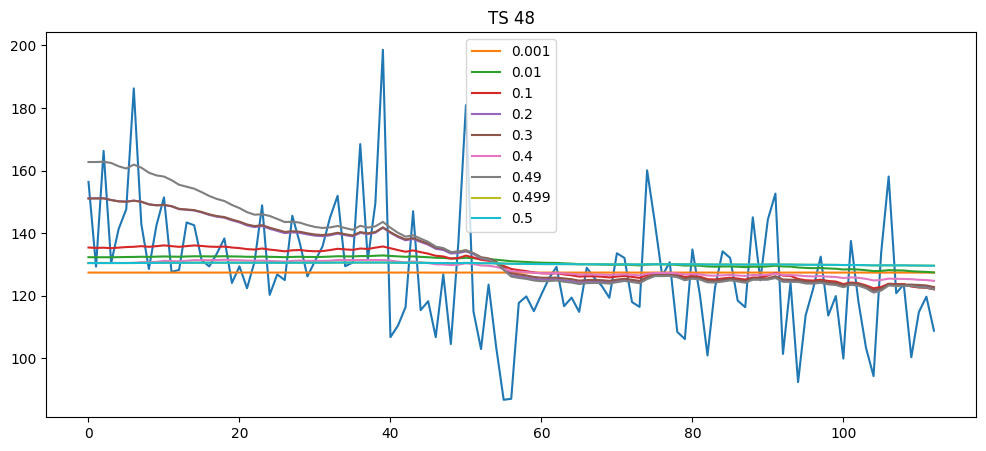

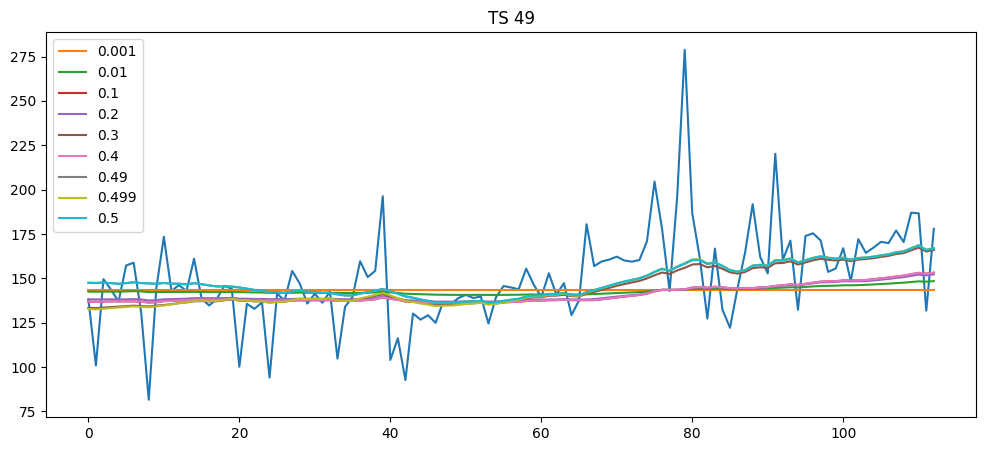

In [14]:
for ts_index in range(50):
    plt.figure(figsize=(12, 5))
    plt.plot(test_dataset[ts_index])
    for mean, strength in zip(means, strenghts):
        plt.plot(mean[0][:, ts_index], label=strength)  # mean is a list with one multivariate time series
    plt.legend()
    plt.title(f'TS {ts_index}')
    plt.show()